# ML Heart Disease Prediction Project

### Import library and dataset 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Taking care of missing values 

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Taking care of duplicate values 

In [4]:
data_dupli = data.duplicated().any()
data_dupli

True

In [5]:
data = data.drop_duplicates()
data_dupli = data.duplicated().any()
data_dupli

False

### Data processing

In [6]:
categorical_col = []
continuous_col = []

for column in data.columns:
    if data[column].nunique() <= 10:
        categorical_col.append(column)
    else:
        continuous_col.append(column)

### Encoding categorical data

In [7]:
print(categorical_col)
print(continuous_col)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [8]:
data['cp'].nunique()

4

In [9]:
categorical_col.remove('sex')
categorical_col.remove('target')

In [10]:
data = pd.get_dummies(data, columns = categorical_col, drop_first = True)

In [11]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler 

In [13]:
st = StandardScaler()
data[continuous_col] = st.fit_transform(data[continuous_col])
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Splitting the dataset into the training set ant test set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = data.drop('target', axis = 1)
y = data['target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

## The target variable is categorical, so this is classification problem  

### Logistic Regression 

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, y_pred_lr)

0.7868852459016393

### SVM (Support Vector Classifier)

In [25]:
from sklearn import svm

In [27]:
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred_svm)

0.8032786885245902

### K Neighbors Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred_knc)

0.7377049180327869

In [37]:
score = []
for k in range(1, 40):
    knc = KNeighborsClassifier(n_neighbors = k)
    knc.fit(X_train, y_train)
    y_pred_knc2 = knc.predict(X_test)
    score.append(accuracy_score(y_test, y_pred_knc2))
    

In [38]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [39]:
knc = KNeighborsClassifier(n_neighbors = 2)
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)
accuracy_score(y_test, y_pred_knc)

0.8032786885245902

### Non-Linear ML Algorithms

In [42]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [43]:
data = data.drop_duplicates()
data.shape

(302, 14)

In [44]:
X = data.drop('target', axis=1)
y = data['target']

In [45]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
accuracy_score(y_test, y_pred_dtc)

0.7868852459016393

### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
accuracy_score(y_test, y_pred_rfc)

0.8524590163934426

###  Gradient Boosting Classifier 

In [50]:
from sklearn.ensemble import GradientBoostingClassifier 

In [52]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)

0.8032786885245902

In [56]:
compare_models = pd.DataFrame({'Models':['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'], 
                               'Accuracy':[accuracy_score(y_test, y_pred_lr),
                                           accuracy_score(y_test, y_pred_svm),
                                           accuracy_score(y_test, y_pred_knc),
                                           accuracy_score(y_test, y_pred_dtc),
                                           accuracy_score(y_test, y_pred_rfc),
                                           accuracy_score(y_test, y_pred_gbc)]})

In [57]:
compare_models

,Models,Accuracy
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.803279
3,DT,0.786885
4,RF,0.852459
5,GB,0.803279


In [58]:
import seaborn as sns

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

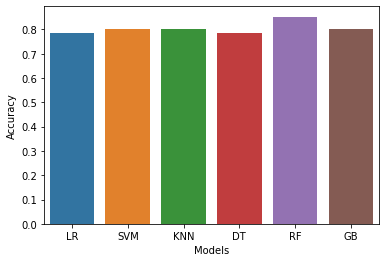

In [61]:
sns.barplot(compare_models['Models'], compare_models['Accuracy'])

In [62]:
X = data.drop('target', axis = 1)
y = data['target']
X.shape

(302, 13)

### Entire Dataset

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

### Prediction on New Data

In [66]:
new_data = pd.DataFrame({'age':52, 
                        'sex':1,
                        'cp':0,
                        'trestbps': 125,
                        'chol': 212,
                        'fbs':0,
                        'restecg':1,
                        'thalach':168,
                        'exang':0,
                        'oldpeak':1.0,
                        'slope':2,
                        'ca':2,
                        'thal':3}, index = [0])

In [67]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [74]:
new_data_pred = rf.predict(new_data)
new_data_pred

array([0], dtype=int64)

In [69]:
if new_data_pred[0] == 0:
    print('No disease')
else:
    print('Disease')

No disease


### Save Model Usign Joblib

In [70]:
import joblib 

In [71]:
joblib.dump(rf, 'model_joblib_heart')

['model_joblib_heart']

In [78]:
model = joblib.load('model_joblib_heart')
model

RandomForestClassifier()

In [83]:
new_data2 = pd.DataFrame({'age':[52, 46], 
                        'sex':[1,0],
                        'cp':[0,1],
                        'trestbps': [125,128],
                        'chol': [212,220],
                        'fbs':[0,1],
                        'restecg':[1,0],
                        'thalach':[168,170],
                        'exang':[0,1],
                        'oldpeak':[1.0,1.0],
                        'slope':[2,1],
                        'ca':[2,1],
                        'thal':[3,1]})

In [84]:
new_data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,46,0,1,128,220,1,0,170,1,1.0,1,1,1


In [85]:
model.predict(new_data2)

array([0, 1], dtype=int64)